# Feature Selection

In [1]:
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2
from matplotlib import pyplot

## League Games
Hold only attributes known before match

In [2]:
LEAGUE_DATAPATH = '/.../data/all_players_league_match_info.csv'

all_league_data = pd.read_csv(LEAGUE_DATAPATH, parse_dates=['startTimestamp', 'player_birth', 'previous_date'])
all_league_data = all_league_data[['player_name','player_position','player_nationality','player_birth','player_foot','player_height','age',\
    'fifa_rating','fifa_potential','after_injury','injury_days','injury_type','rest_days','form_last1','form_last3','form_last5','form_last10',\
    'season','current_team_category','opponent_category','home_fixture',\
    'Performance']]
all_league_data

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,form_last1,form_last3,form_last5,form_last10,season,current_team_category,opponent_category,home_fixture,Performance
0,Messi,F,ARG,1987-06-24,Left,169,28.18,94,95,0,0,NaN,78.0,NaN,NaN,NaN,NaN,15-16,1,0,0,7.8
1,Messi,F,ARG,1987-06-24,Left,169,28.20,94,95,0,0,NaN,6.0,8.60,NaN,NaN,NaN,15-16,1,0,1,9.4
2,Messi,F,ARG,1987-06-24,Left,169,28.24,94,95,0,0,NaN,14.0,9.00,NaN,NaN,NaN,15-16,1,1,0,8.6
3,Messi,F,ARG,1987-06-24,Left,169,28.26,94,95,0,0,NaN,4.0,9.30,8.950,NaN,NaN,15-16,1,0,1,10.0
4,Messi,F,ARG,1987-06-24,Left,169,28.27,94,95,0,0,NaN,3.0,9.55,9.275,NaN,NaN,15-16,1,0,0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Azpilicueta,D,ESP,1989-08-28,Right,178,32.41,83,83,0,0,NaN,3.0,7.05,7.175,7.066667,7.018182,21-22,1,1,0,7.2
5627,Azpilicueta,D,ESP,1989-08-28,Right,178,32.41,83,83,0,0,NaN,3.0,7.20,7.175,7.066667,7.036364,21-22,1,0,0,7.2
5628,Azpilicueta,D,ESP,1989-08-28,Right,178,32.43,83,83,0,0,NaN,5.0,7.30,7.175,7.216667,7.081818,21-22,1,1,1,7.4
5629,Azpilicueta,D,ESP,1989-08-28,Right,178,32.55,83,83,1,7,Knock,16.0,6.95,7.075,7.100000,6.990909,21-22,1,0,0,6.5


### sklearn feature selection

In [3]:
league_data = pd.read_csv(LEAGUE_DATAPATH, parse_dates=['startTimestamp', 'player_birth', 'previous_date'])
league_data = league_data[['player_name','player_position','player_foot','player_height','age',\
    'fifa_rating','fifa_potential','after_injury','injury_days','rest_days','form_last1','form_last3','form_last5','form_last10',\
    'current_team_category','opponent_category','home_fixture',\
    'Performance']]
league_data


league_data.isnull().any(axis = 1).sum()
# league_data
# league_data.iloc[220:240]
# league_data.dropna(how='any', inplace=True)
league_data['form_last1'] = league_data['form_last1'].fillna(league_data.groupby('player_name')['form_last1'].transform('mean'))
league_data['form_last3'] = league_data['form_last3'].fillna(league_data.groupby('player_name')['form_last3'].transform('mean'))
league_data['form_last5'] = league_data['form_last5'].fillna(league_data.groupby('player_name')['form_last5'].transform('mean'))
league_data['form_last10'] = league_data['form_last10'].fillna(league_data.groupby('player_name')['form_last10'].transform('mean'))
league_data.isnull().any(axis = 1).sum()
league_data = pd.get_dummies(league_data, prefix=['player_position', 'player_foot'], columns=['player_position', 'player_foot'])
# league_data.drop(labels=['player_name'], axis=1, inplace=True)
league_data = pd.get_dummies(league_data, prefix=['player_name'], columns=['player_name'])
# league_data = pd.get_dummies(league_data, prefix=['injury_type'], columns=['injury_type'])
league_data

,player_name,player_position,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,rest_days,form_last1,form_last3,form_last5,form_last10,current_team_category,opponent_category,home_fixture,Performance
0,Messi,F,Left,169,28.18,94,95,0,0,78.0,NaN,NaN,NaN,NaN,1,0,0,7.8
1,Messi,F,Left,169,28.20,94,95,0,0,6.0,8.60,NaN,NaN,NaN,1,0,1,9.4
2,Messi,F,Left,169,28.24,94,95,0,0,14.0,9.00,NaN,NaN,NaN,1,1,0,8.6
3,Messi,F,Left,169,28.26,94,95,0,0,4.0,9.30,8.950,NaN,NaN,1,0,1,10.0
4,Messi,F,Left,169,28.27,94,95,0,0,3.0,9.55,9.275,NaN,NaN,1,0,0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Azpilicueta,D,Right,178,32.41,83,83,0,0,3.0,7.05,7.175,7.066667,7.018182,1,1,0,7.2
5627,Azpilicueta,D,Right,178,32.41,83,83,0,0,3.0,7.20,7.175,7.066667,7.036364,1,0,0,7.2
5628,Azpilicueta,D,Right,178,32.43,83,83,0,0,5.0,7.30,7.175,7.216667,7.081818,1,1,1,7.4
5629,Azpilicueta,D,Right,178,32.55,83,83,1,7,16.0,6.95,7.075,7.100000,6.990909,1,0,0,6.5


300

0

,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,rest_days,form_last1,form_last3,form_last5,form_last10,current_team_category,opponent_category,home_fixture,Performance,player_position_D,player_position_F,player_position_G,player_position_M,player_foot_Left,player_foot_Right,player_name_Azpilicueta,player_name_Barella,player_name_Benzema,player_name_Bonucci,player_name_Bruno,player_name_Chiellini,player_name_Cristiano,player_name_Debruyne,player_name_Dias,player_name_Donnarumma,player_name_Foden,player_name_Haaland,player_name_Jorginho,player_name_Kane,player_name_Kante,player_name_Kjaer,player_name_Lautaro,player_name_Lewandowski,player_name_Lukaku,player_name_Mahrez,player_name_Mbappe,player_name_Messi,player_name_Modric,player_name_Moreno,player_name_Mount,player_name_Neymar,player_name_Pedri,player_name_Salah,player_name_Sterling,player_name_Suarez
0,169,28.18,94,95,0,0,78.0,8.347098,8.346847,8.345455,8.349937,1,0,0,7.8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,169,28.20,94,95,0,0,6.0,8.600000,8.346847,8.345455,8.349937,1,0,1,9.4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,169,28.24,94,95,0,0,14.0,9.000000,8.346847,8.345455,8.349937,1,1,0,8.6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,169,28.26,94,95,0,0,4.0,9.300000,8.950000,8.345455,8.349937,1,0,1,10.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,169,28.27,94,95,0,0,3.0,9.550000,9.275000,8.345455,8.349937,1,0,0,9.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,178,32.41,83,83,0,0,3.0,7.050000,7.175000,7.066667,7.018182,1,1,0,7.2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5627,178,32.41,83,83,0,0,3.0,7.200000,7.175000,7.066667,7.036364,1,0,0,7.2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5628,178,32.43,83,83,0,0,5.0,7.300000,7.175000,7.216667,7.081818,1,1,1,7.4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,178,32.55,83,83,1,7,16.0,6.950000,7.075000,7.100000,6.990909,1,0,0,6.5,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from time import time

In [5]:
log_reg = LinearRegression()
X = league_data.loc[:, league_data.columns != 'Performance']
y = league_data['Performance']
feature_names = league_data.loc[:, league_data.columns != 'Performance'].columns.values

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    log_reg, n_features_to_select=5, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by backward sequential selection: ['fifa_rating' 'fifa_potential' 'form_last1' 'opponent_category'
 'home_fixture']
Done in 97.323s


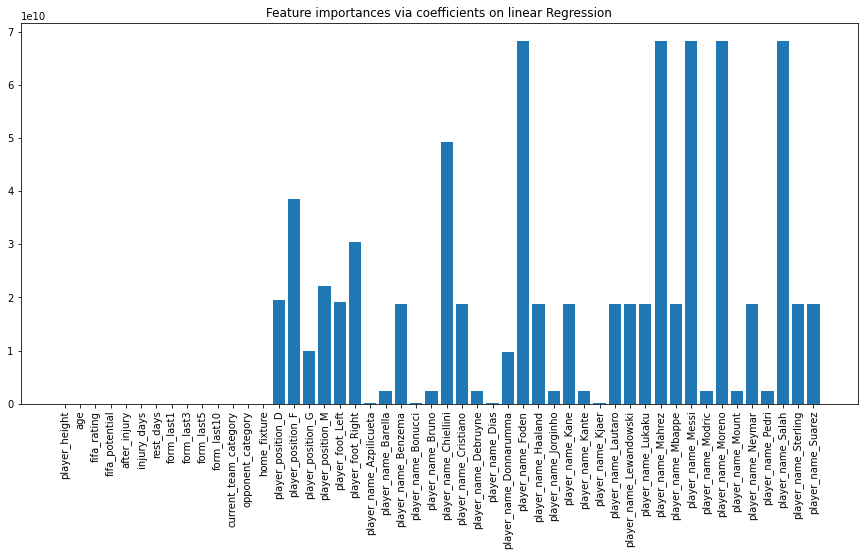

In [6]:
lin_reg = LinearRegression().fit(X, y)
importance = np.abs(lin_reg.coef_)
plt.figure(figsize=(15, 7));
plt.bar(height=importance, x=feature_names);
plt.xticks(rotation = 90);
plt.title("Feature importances via coefficients on linear Regression");
plt.show();

### Feature Selection with StatsModels for All Data

In [7]:
import statsmodels.api as sm

def backward_elim(important_df, reference_var):
    X = important_df.drop(reference_var, axis=1)  # Feature Matrix
    y = important_df[reference_var]  # Target Variable

    # Backward Elimination
    cols = list(X.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        # Adding constant column of ones, mandatory for sm.OLS model
        X_1 = sm.add_constant(X_1, has_constant='add')
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            print(p)
            break
    selected_features_BE = cols
    return selected_features_BE


In [9]:
sel = backward_elim(league_data, 'Performance')
# league_data.columns
sel

injury_days          1.921702e-02
rest_days            3.258982e-02
form_last1           0.000000e+00
opponent_category    1.064762e-13
home_fixture         3.883502e-18
dtype: float64


['injury_days', 'rest_days', 'form_last1', 'opponent_category', 'home_fixture']

In [11]:
## Full model
X = league_data.drop('Performance', axis=1)  # Feature Matrix
y = league_data['Performance']  # Target Variable
X_1 = X[list(X.columns)]
# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_1, has_constant='add')
model = sm.OLS(y, X_1).fit()
model.summary()
model.rsquared
model.mse_resid

# Simple model
X = league_data[['injury_days', 'rest_days', 'form_last1', 'opponent_category', 'home_fixture']]  # Feature Matrix
y = league_data['Performance']  # Target Variable
X_1 = X[list(X.columns)]
# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_1, has_constant='add')
model = sm.OLS(y, X_1).fit()
model.summary()
model.rsquared
model.mse_resid

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     193.4
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:28:50   Log-Likelihood:                -4278.3
No. Observations:                5631   AIC:                             8643.
Df Residuals:                    5588   BIC:                             8928.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0027      0.016     -0.167      0.868      -0.035       0.030
player_height              -0.0004      0.002     -0.184      0.854      -0.005       0.004
age                         0.0006      0.005      0.112      0.911      -0.010       0.011
fifa_rating                 0.0010      0.005      0.187      0.852      -0.009       0.011
fifa_potential              0.0002      0.008      0.024      0.981      -0.015       0.015
after_injury                0.0237      0.047      0.502      0.616      -0.069       0.116
injury_days                -0.0040      0.002     -2.242      0.025      -0.008      -0.001
rest_days                   0.0014      0.001      2.272      0.023       0.000       0.003
form_last1                  0.9675      0.019     49.924      0.000       0.930       1.005
form_last3                  0.0500      0.039      1.296      0.195      -0.026       0.126
form_last5                  0.0012      0.048      0.026      0.980      -0.092       0.095
form_last10                -0.0316      0.043     -0.739      0.460      -0.116       0.052
current_team_category       0.0303      0.038      0.804      0.422      -0.044       0.104
opponent_category          -0.1366      0.018     -7.779      0.000      -0.171      -0.102
home_fixture                0.1211      0.014      8.683      0.000       0.094       0.148
player_position_D           0.0015      0.024      0.060      0.952      -0.046       0.049
player_position_F          -0.0052      0.018     -0.294      0.769      -0.040       0.030
player_position_G          -0.0048      0.023     -0.207      0.836      -0.050       0.041
player_position_M           0.0058      0.025      0.237      0.813      -0.042       0.054
player_foot_Left            0.0042      0.016      0.261      0.794      -0.027       0.035
player_foot_Right          -0.0069      0.010     -0.658      0.510      -0.027       0.014
player_name_Azpilicueta     0.0099      0.036      0.274      0.784      -0.061       0.081
player_name_Barella         0.0073      0.042      0.172      0.863      -0.076       0.090
player_name_Benzema        -0.0163      0.043     -0.378      0.705      -0.101       0.068
player_name_Bonucci        -0.0173      0.036     -0.482      0.629      -0.088       0.053
player_name_Bruno           0.0062      0.041      0.151      0.880      -0.075       0.087
player_name_Chiellini      -0.0160      0.039     -0.411      0.681      -0.093       0.061
player_name_Cristiano      -0.0174      0.044     -0.393      0.694      -0.104       0.069
player_name_Debruyne        0.0107      0.038      0.281      0.779      -0.064       0.086
player_name_Dias            0.0117      0.046      0.256      0.798      -0.078       0.102
player_name_Donnarumma     -0.0048      0.023  

0.5923985897472629

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Performance   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1630.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:28:50   Log-Likelihood:                -4283.3
No. Observations:                5631   AIC:                             8579.
Df Residuals:                    5625   BIC:                             8618.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0397      0.084      0.475      0.635      -0.124       0.204
injury_days          -0.0033      0.001     -2.342      0.019      -0.006      -0.001
rest_days             0.0013      0.001      2.138      0.033       0.000       0.002
form_last1            0.9891      0.011     87.750      0.000       0.967       1.011
opponent_category    -0.1249      0.017     -7.451      0.000      -0.158      -0.092
home_fixture          0.1204      0.014      8.712      0.000       0.093       0.147
==============================================================================
Omnibus:                       78.621   Durbin-Watson:                   3.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.240
Skew:                           0.022   Prob(JB):                     2.89e-32
Kurtosis:                       3.786   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.5916796542087513